In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/titanic/train.csv")

In [8]:
test = pd.read_csv("/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/titanic/test.csv")

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


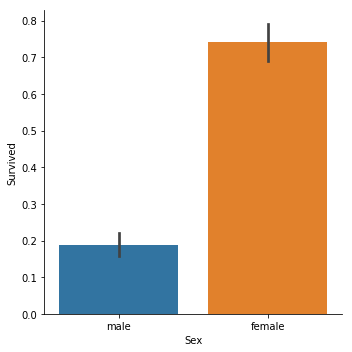

In [10]:
#EDA
import seaborn as sns

sns.catplot(x = 'Sex', y = 'Survived', kind = "bar", data = train)
#baseline model is that if you just predict based on sex, 
#you have a 75% chance of getting it right if you say woman
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


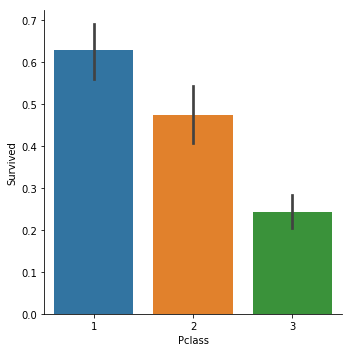

In [11]:
sns.catplot(x = "Pclass", y = "Survived", kind = "bar", data = train)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


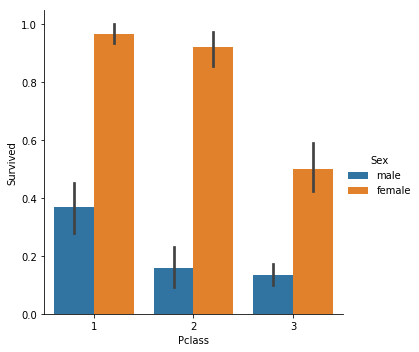

In [12]:
sns.catplot(x = "Pclass", y = "Survived", kind = "bar", hue="Sex", data = train)
plt.show()

In [13]:
#lets create a simple two variable logistic-regression model...
X_train = train.loc[:, ["Sex", "Pclass"]]
y_train = train["Survived"]
X_test = test.loc[:, ["Sex","Pclass"]]


In [14]:
X_train.head()

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3


In [15]:
X_train = pd.get_dummies(X_train, columns = ["Sex", "Pclass"], drop_first = True)

In [16]:
X_test = pd.get_dummies(X_test, columns = ["Sex", "Pclass"], drop_first = True)

In [17]:
X_train.head()

,Sex_male,Pclass_2,Pclass_3
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,1,0,1


In [18]:
X_train

,Sex_male,Pclass_2,Pclass_3
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,1,0,1
5,1,0,1
6,1,0,0
7,1,0,1
8,0,0,1
9,0,1,0


In [19]:
#X_train.columns

In [20]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "liblinear")
logreg.get_params()

#note that C is the regularization parameter for logistic regression 
#(the smaller the value of C, the larger the amount of regularization)

#penalty is l2 or l1 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
logreg.coef_

array([[-2.48809433, -0.67634771, -1.7159975 ]])

In [23]:
logreg.score(X_train, y_train)

0.7867564534231201

In [24]:
logreg.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
#logreg.score(X_test,y_test)

In [20]:
logreg.predict_proba(X_test)[:,1]

array([0.10496527, 0.58537091, 0.24906911, 0.10496527, 0.58537091,
       0.10496527, 0.58537091, 0.24906911, 0.58537091, 0.10496527,
       0.10496527, 0.39478666, 0.88704025, 0.24906911, 0.88704025,
       0.79971453, 0.24906911, 0.10496527, 0.58537091, 0.58537091,
       0.39478666, 0.10496527, 0.88704025, 0.39478666, 0.88704025,
       0.10496527, 0.88704025, 0.10496527, 0.39478666, 0.10496527,
       0.24906911, 0.24906911, 0.58537091, 0.58537091, 0.39478666,
       0.10496527, 0.58537091, 0.58537091, 0.10496527, 0.10496527,
       0.10496527, 0.39478666, 0.10496527, 0.79971453, 0.88704025,
       0.10496527, 0.39478666, 0.10496527, 0.88704025, 0.58537091,
       0.39478666, 0.24906911, 0.79971453, 0.88704025, 0.24906911,
       0.10496527, 0.10496527, 0.10496527, 0.10496527, 0.88704025,
       0.10496527, 0.24906911, 0.10496527, 0.58537091, 0.39478666,
       0.79971453, 0.58537091, 0.39478666, 0.39478666, 0.88704025,
       0.58537091, 0.10496527, 0.58537091, 0.39478666, 0.88704

In [21]:
logreg.intercept_

array([2.06085883])

In [22]:
logreg.coef_

array([[-2.48809433, -0.67634771, -1.7159975 ]])

In [23]:
coeffs = pd.DataFrame({
    "Variable":X_train.columns,
    "Weight":logreg.coef_[0]
})
coeffs

,Variable,Weight
0,Sex_male,-2.488094
1,Pclass_2,-0.676348
2,Pclass_3,-1.715997


In [24]:
output = X_train.dot(logreg.coef_.T) + logreg.intercept_
output.head()

,0
0,-2.143233
1,2.060859
2,0.344861
3,2.060859
4,-2.143233


In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [26]:
sigmoid(output).head()

,0
0,0.104965
1,0.887040
2,0.585371
3,0.887040
4,0.104965


In [27]:
preds = logreg.predict(X_test)

lm_predictions = pd.DataFrame({
    "PassengerID":test.PassengerId,
    "Survived":preds
})

In [28]:
lm_predictions.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [29]:
lm_predictions.to_csv("/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/Untitled Folder/submissions.csv", index = False)

In [30]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rf.feature_importances_

array([0.73916994, 0.02748232, 0.23334775])

In [34]:
importances = pd.DataFrame({
    "Features":X_train.columns,
    "Importance":rf.feature_importances_
})

In [35]:
importances

,Features,Importance
0,Sex_male,0.739170
1,Pclass_2,0.027482
2,Pclass_3,0.233348


In [36]:
rf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
rf.predict_proba(X_test)

array([[0.87438318, 0.12561682],
       [0.49536945, 0.50463055],
       [0.85286569, 0.14713431],
       [0.87438318, 0.12561682],
       [0.49536945, 0.50463055],
       [0.87438318, 0.12561682],
       [0.49536945, 0.50463055],
       [0.85286569, 0.14713431],
       [0.49536945, 0.50463055],
       [0.87438318, 0.12561682],
       [0.87438318, 0.12561682],
       [0.63896895, 0.36103105],
       [0.02829872, 0.97170128],
       [0.85286569, 0.14713431],
       [0.02829872, 0.97170128],
       [0.11411673, 0.88588327],
       [0.85286569, 0.14713431],
       [0.87438318, 0.12561682],
       [0.49536945, 0.50463055],
       [0.49536945, 0.50463055],
       [0.63896895, 0.36103105],
       [0.87438318, 0.12561682],
       [0.02829872, 0.97170128],
       [0.63896895, 0.36103105],
       [0.02829872, 0.97170128],
       [0.87438318, 0.12561682],
       [0.02829872, 0.97170128],
       [0.87438318, 0.12561682],
       [0.63896895, 0.36103105],
       [0.87438318, 0.12561682],
       [0.

In [38]:
rf_preds = rf.predict(X_test)

In [39]:
rf_submissions = pd.DataFrame({
    "PassengerID":test.PassengerId,
    "Survived":rf_preds
})

In [40]:
rf_submissions.to_csv("/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/Untitled Folder/submissions_new.csv", index = False)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
2 ** 12

4096

In [43]:
set(train["SibSp"])

{0, 1, 2, 3, 4, 5, 8}

In [44]:
#pick varibles/make transforms
#put into train/test set 
#then get dummies for unordered categoricals in the train/test sets

#so Sex/Pclass are two important dummies
#lets also use Age (but 177 are missing, can possibly impute), Fare
#

In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
#train.shape

In [47]:
train["Age"].mean()

29.69911764705882

In [48]:
for items in train["Age"]:
    if items == "nan":
        train["Age"]

In [49]:
empty = []
for i in train.index.tolist():
    if type(train["Age"][i]) != "numpy.float64":
        train["Age"][i] = train["Age"].mean()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
train["Age"].isnull().sum()

0

In [51]:
#type(train["Age"][3])

In [52]:
#X_train = train.loc[:, "Age","Sex","Fare","PClass"]

In [53]:
titles = []
for names in train["Name"]:
    titles.append(names.split(",")[1].split(" ")[1])

train["Greeting"] = titles

In [54]:
X_train = train.loc[:, ["Age","Sex","Fare","Pclass","Greeting"]]
X_test = test.loc[:, ["Age","Sex","Fare","Pclass","Greeting"]]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [55]:
X_train.columns

Index(['Age', 'Sex', 'Fare', 'Pclass', 'Greeting'], dtype='object')

In [56]:
X_train = pd.get_dummies(X_train, columns = ["Sex","Pclass" ,"Greeting"], drop_first = True)
X_test = pd.get_dummies(X_test, columns = ["Sex","Pclass","Greeting"], drop_first = True)

In [57]:
X_train.columns

Index(['Age', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Greeting_Col.',
       'Greeting_Don.', 'Greeting_Dr.', 'Greeting_Jonkheer.', 'Greeting_Lady.',
       'Greeting_Major.', 'Greeting_Master.', 'Greeting_Miss.',
       'Greeting_Mlle.', 'Greeting_Mme.', 'Greeting_Mr.', 'Greeting_Mrs.',
       'Greeting_Ms.', 'Greeting_Rev.', 'Greeting_Sir.', 'Greeting_the'],
      dtype='object')

In [45]:
import xgboost

In [48]:
from xgboost import XGBClassifier

In [52]:
model = XGBClassifier()

In [53]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [54]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [55]:
y_pred = model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [56]:
preds = model.predict(X_test)

xg_predictions = pd.DataFrame({
    "PassengerID":test.PassengerId,
    "Survived":preds
})

xg_predictions.to_csv("/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/Untitled Folder/submissions2.csv", index = False)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Grid Search

In [ ]:
#very useful way to make comparisons between different models
#sets up a graph of options to try out, according to different parameters you specify 

#define parameters you want to test
#load them into a grid
#fit (this can take awhile)

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
param_grid = {
    "penalty":["l1","l2"],
    "C":[.0001,.001,.01,.1,1,10,100,1000,10000]
}

In [6]:
#X_train

NameError: name 'X_train' is not defined

In [26]:
grid = GridSearchCV(estimator = logreg, param_grid = param_grid , cv = 10)

In [27]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [30]:
grid_results = pd.DataFrame(grid.cv_results_)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [32]:
grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001714,0.000401,0.000376,0.000053,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
1,0.001785,0.000198,0.000339,0.000040,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
2,0.001942,0.000825,0.000409,0.000159,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
3,0.001707,0.000282,0.000296,0.000034,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
4,0.001882,0.000858,0.000377,0.000205,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317


In [33]:
grid_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [40]:
cols = ["param_C", "param_penalty", "mean_test_score", "std_test_score",
       "rank_test_score", "mean_train_score", "std_train_score"]
grid_results = grid_results.loc[:, cols]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [43]:
#grid_results.sort_values(by = "rank_best_score")